In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
path = 'drive/MyDrive/'

# Q=1 : getting coordinates of sources

In [ ]:
data_x=np.load(path+'X_Q=1_MLP.npy')
data_y=np.load(path+'Y_Q=1_MLP.npy') # labels

In [ ]:
data_y[0]

array([ 12.5, -50. , -65. ])

In [ ]:
coord_dict={}
count =0

In [ ]:
for z in range(-85, 96, 5):
  for y in range(-125, 86, 5):
    for x in np.arange(-87.5,88.5,5):
      li = [x,y,z]
      key =  np.asarray(li)
      coord_dict[count]= key 
      count= count+1

In [ ]:
data_y_ = np.zeros((data_y.shape[1],3))
data_y_.shape

(1486881, 3)

In [ ]:
for n in range(data_y.shape[1]):
  data_y_[n]=coord_dict[data_y[0,n]]

In [ ]:
data_y_

array([[ 12.5, -50. , -65. ],
       [ 12.5, -50. , -65. ],
       [ 12.5, -50. , -65. ],
       ...,
       [  7.5,  -5. ,  80. ],
       [  7.5,  -5. ,  80. ],
       [  7.5,  -5. ,  80. ]])

In [ ]:
np.save(path+'Y_Q=1_MLP.npy',data_y_)

# Q=2 : getting coordinates of sources

In [ ]:
# data_x=np.load(path+'X_Q=2_MLP.npy')
data_y=np.load(path+'Y_Q=2_MLP.npy') # labels

In [ ]:
data_y.shape 

(2, 625000)

In [ ]:
data_y[:,6000]

array([ 669, 1029])

In [ ]:
coord_dict={}
count =0
for z1 in np.arange(-60, 61, 15):
    for y1 in np.arange(-90, 41, 15):
      for x in np.arange(-52.5,53.5,15):
        li = [x,y1,z1]
        key =  np.asarray(li)
        coord_dict[count]=key
        count= count+1
      

for z2 in np.arange(-60, 61, 15):
  for y1 in np.arange(-90, 41, 15):
      for x in np.arange(-52.5,53.5,15):
        li = [x,y1,z2]
        key =  np.asarray(li)
        coord_dict[count]=key
        count= count+1
       


for z1 in np.arange(-55, 66, 15):
    for y1 in np.arange(-85, 46, 15):
      for x in np.arange(-52.5,53.5,15):
        li = [x,y1,z1]
        key =  np.asarray(li)
        coord_dict[count]=key
        count= count+1

for z2 in np.arange(-55, 66, 15):
  for y1 in np.arange(-85, 46, 15):
      for x in np.arange(-52.5,53.5,15):
        li = [x,y1,z2]
        key =  np.asarray(li)
        coord_dict[count]=key
        count= count+1

In [ ]:
data_y_ = np.zeros((data_y.shape[1],6))
data_y_.shape

(625000, 6)

In [ ]:
coord_dict[data_y[0,0]]

array([-37.5, -60. , -60. ])

In [ ]:
coord_dict[data_y[1,0]]

array([-37.5, -60. , -45. ])

In [ ]:
for n in range(data_y.shape[1]):
  data_y_[n,0:3]=coord_dict[data_y[0,n]]
  data_y_[n,3:6]=coord_dict[data_y[1,n]]

In [ ]:
data_y_

array([[-37.5, -60. , -60. , -37.5, -60. , -45. ],
       [-37.5, -60. , -60. , -37.5, -60. , -45. ],
       [-37.5, -60. , -60. , -37.5, -60. , -45. ],
       ...,
       [  7.5,  20. ,  65. ,   7.5,  20. ,  50. ],
       [  7.5,  20. ,  65. ,   7.5,  20. ,  50. ],
       [  7.5,  20. ,  65. ,   7.5,  20. ,  50. ]])

In [ ]:
np.save(path+'Y_Q=2_MLP.npy',data_y_)

# Dataset Q=1 Preprocessing for MLP - Random shuffle and normalisation

In [ ]:
import numpy as np
path = 'drive/MyDrive/'

In [ ]:
Q=1
data_x=np.load(path+'X_Q=%d_MLP.npy'%Q).T
data_y=np.load(path+'Y_Q=%d_MLP.npy'%Q) # labels

In [ ]:
print(data_x.shape, data_y.shape)

(1486881, 97) (1486881, 3)


In [ ]:
# normalise the data (x,y)
x_mean=data_x.mean(axis=0,keepdims=True)
x_std=data_x.std(axis=0,keepdims=True)
y_mean=data_y.mean(axis=0,keepdims=True)
y_std=data_y.std(axis=0,keepdims=True)

In [ ]:
y_std

array([[32.52091561, 39.55741222, 32.56242532]])

In [ ]:
print(x_mean.shape,x_std.shape,y_mean.shape,y_std.shape)

(1, 97) (1, 97) (1, 3) (1, 3)


In [ ]:
# print(x_mean,x_std,y_mean,y_std)

In [ ]:
data_x-=x_mean
data_x/=x_std
data_y-=y_mean
data_y/=y_std

In [ ]:
# random shuffling of data
data = np.hstack((data_x,data_y))
data.shape

(1486881, 100)

In [ ]:
print(data[0,:5])
np.random.shuffle(data)
print(data[0,:5])

[-0.41540272  0.60430061 -1.06905462 -0.44949985 -0.51020468]
[-0.01381905  0.01398679  0.00248277 -0.00449341  0.01053614]


In [ ]:
data_x=data[:,:-3]
data_y=data[:,-3:]
print(data_x.shape,data_y.shape)

(1486881, 97) (1486881, 3)


In [ ]:
np.save(path+'Dataset/X_Q_%d_MLP.npy'%Q,data[:,:-3])
np.save(path+'Dataset/Y_Q_%d_MLP.npy'%Q,data[:,-3:])

In [ ]:
x=np.load(path+'Dataset/X_Q_%d_MLP.npy'%1)
x.dtype
x=x.astype(np.float32)
x.dtype

dtype('float32')

In [ ]:
y=np.load(path+'Dataset/Y_Q_%d_MLP.npy'%1)
y.dtype
y=y.astype(np.float32)
y.dtype

dtype('float32')

In [ ]:
np.save(path+'Dataset/X_Q_%d_MLP.npy'%1,x)
np.save(path+'Dataset/Y_Q_%d_MLP.npy'%1,y)

In [ ]:
data_x[0,:5]

In [ ]:
data_y[:10]

array([[-0.09634921,  1.29057148, -0.59785701],
       [-1.01883246,  1.29057148, -0.59785701],
       [ 0.82613405,  1.5433686 , -0.4443058 ],
       [-1.32632688, -1.23739975, -0.4443058 ],
       [-1.17257967, -0.0998127 , -0.13720336],
       [ 0.057398  , -0.73180551, -2.13336917],
       [-0.71133804, -0.35260982, -1.82626674],
       [-0.09634921,  1.16417291,  0.63055272],
       [ 0.057398  , -0.98460263,  0.16989907],
       [-1.17257967,  0.53218011,  1.24475758]])


# Dataset Q=2 Preprocessing for MLP - Random shuffle and normalisation

In [ ]:
import numpy as np
path = 'drive/MyDrive/'
Q=2
data_x=np.load(path+'X_Q=%d_MLP.npy'%Q).T
data_y=np.load(path+'Y_Q=%d_MLP.npy'%Q) # labels

In [ ]:
print(data_x.shape, data_y.shape)

(625000, 97) (625000, 6)


In [ ]:
# normalise the data (x,y)
x_mean=data_x.mean(axis=0,keepdims=True)
x_std=data_x.std(axis=0,keepdims=True)
y_mean=data_y.mean(axis=0,keepdims=True)
y_std=data_y.std(axis=0,keepdims=True)

In [ ]:
y_std

array([[30.23864226, 32.94725408, 34.24295688, 30.23864226, 32.94725408,
        34.24295688]])

In [ ]:
print(x_mean.shape,x_std.shape,y_mean.shape,y_std.shape)

(1, 97) (1, 97) (1, 6) (1, 6)


In [ ]:
# print(x_mean,x_std,y_mean,y_std)

In [ ]:
data_x-=x_mean
data_x/=x_std
data_y-=y_mean
data_y/=y_std

In [ ]:
# random shuffling of data
data = np.hstack((data_x,data_y))
data.shape

(625000, 103)

In [ ]:
print(data[0,:5])
np.random.shuffle(data)
print(data[0,:5])

[ 0.07269141 -0.00883582  0.05523939 -0.00300683  0.02511059]
[-0.05263965 -0.01103623 -0.01985167  0.0212366   0.00547584]


In [ ]:
data_x=data[:,:-6]
data_y=data[:,-6:]
print(data_x.shape,data_y.shape)

(625000, 97) (625000, 6)


In [ ]:
np.save(path+'Dataset/X_Q_%d_MLP.npy'%Q,data[:,:-6])
np.save(path+'Dataset/Y_Q_%d_MLP.npy'%Q,data[:,-6:])

In [ ]:
x=np.load(path+'Dataset/X_Q_%d_MLP.npy'%2)
print(x.dtype)
x=x.astype(np.float32)
x.dtype

float64


dtype('float32')

In [ ]:
y=np.load(path+'Dataset/Y_Q_%d_MLP.npy'%2)
print(y.dtype)
y=y.astype(np.float32)
y.dtype

float64


dtype('float32')

In [ ]:
np.save(path+'Dataset/X_Q_%d_MLP.npy'%2,x)
np.save(path+'Dataset/Y_Q_%d_MLP.npy'%2,y)

In [ ]:
data_x[0,:5]

array([-0.05263965, -0.01103623, -0.01985167,  0.0212366 ,  0.00547584])

In [ ]:
data_y[:3]

array([[-0.75527201, -1.40282404,  0.68195045, -0.75527201, -1.40282404,
        -1.07023468],
       [ 0.73289005, -1.40282404,  1.55804302,  0.73289005, -1.40282404,
        -1.50828096],
       [ 0.23683603, -0.49227775, -1.50828096,  0.23683603, -0.49227775,
        -1.94632725]])

# Deep EEG - Multi Layer Perceptron

In [ ]:
import torch
import torch.nn as nn

class DeepEEG_MLP(nn.Module): 
  def __init__(self, M=97, Q=1):
    super(DeepEEG_MLP, self).__init__()
    self.fc1 = nn.Linear(M, 3000)
    self.fc2 = nn.Linear(3000, 2500)
    self.fc3 = nn.Linear(2500, 1200)
    self.fc4 = nn.Linear(1200, 3*Q) #3 coordinates for each ECD source

  def forward(self,inp):
    out = torch.sigmoid(self.fc1(inp))
    out = torch.sigmoid(self.fc2(out))
    out = torch.sigmoid(self.fc3(out))
    out = self.fc4(out)
    return out

def DeepEEG_MLP_Model(M=97, Q=1):
  # M - dimension of single snapshot sample taken from M (=97) sensors
  # Q - number of equivalent current dipole (ECD) sources 
  return DeepEEG_MLP(M, Q)

In [ ]:
from torchsummary import summary
net = DeepEEG_MLP_Model(97,2)
summary(net, input_size=(97,))
# net

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 3000]         294,000
            Linear-2                 [-1, 2500]       7,502,500
            Linear-3                 [-1, 1200]       3,001,200
            Linear-4                    [-1, 6]           7,206
Total params: 10,804,906
Trainable params: 10,804,906
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.05
Params size (MB): 41.22
Estimated Total Size (MB): 41.27
----------------------------------------------------------------


# Execute Model Training

In [ ]:
import os
import numpy as np
import PIL.Image as Image
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset

class EEG(Dataset):
    def __init__(self, root='./', train=True,Q=1,split=0.8):
        super(EEG, self).__init__()
        path='train' if train else 'val'
        self.data=np.load(root+'X_Q_%d_MLP.npy'%Q)#[:200000]
        self.targets=np.load(root+'Y_Q_%d_MLP.npy'%Q)#[:200000]
        split=int(0.8*self.data.shape[0])
        if train:
            self.data=self.data[:split]
            self.targets=self.targets[:split]
        else:
            self.data=self.data[split:]
            self.targets=self.targets[split:]

    def __getitem__(self, index):
        x, target = self.data[index], self.targets[index]
        return x, target

    def __len__(self):
        return self.data.shape[0]

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader

def main(Q=1,lr=0.01,epochs=10):
    exp_name='MLP_Q=%d'%Q
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    # print(torch.cuda.get_device_properties(0))
    
    # Data
    print('==> Preparing data..')
    path = 'drive/MyDrive/Dataset/'
    trainset = EEG(root=path,train=True,Q=Q,split=.8)
    trainloader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
    testset = EEG(root=path,train=False,Q=Q,split=.8)
    testloader = DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

    # Model
    print('==> Building model..')
    net = DeepEEG_MLP_Model(M=97, Q=Q)
    net = net.to(device)
    if device == 'cuda':
        net = torch.nn.DataParallel(net)
        cudnn.benchmark = True
    
    start_epoch = 1
    end_epoch = epochs+1
    # Load checkpoint.
    if os.path.exists('%s_model.pth'%exp_name):        
        print('==> Resuming from last epoch..')
        net.load_state_dict(torch.load('%s_model.pth'%exp_name))

    criterion = nn.MSELoss()
    optimizer = optim.SGD(net.parameters(), lr=lr) #, momentum=0.9, weight_decay=0.0001
    trainloss, testloss, trainacc, testacc = [], [], [], []
    for epoch in range(start_epoch, end_epoch):
        if epoch%10==0:
            lr/=10.
            optimizer = optim.SGD(net.parameters(), lr=lr) #, momentum=0.9, weight_decay=0.0001

        l=train(epoch, net, trainloader, device, optimizer, criterion)
        trainloss.append(l)
        l=test(epoch, net, testloader, device, criterion, exp_name)
        testloss.append(l)
        
        print('Epoch  % 2d Train Loss: %2.5f Test Loss: %2.5f'%(epoch,trainloss[-1],testloss[-1]))
        # display.clear_output(wait=True)

    torch.save(net.state_dict(), '%s_model.pth'%exp_name)
    Save_Stats(trainloss, testloss, exp_name)

def train(epoch, net, trainloader, device, optimizer, criterion):
    net.train()
    train_loss = 0
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device).float(), targets.to(device).float()
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    return train_loss/(batch_idx+1)

def test(epoch, net, testloader, device, criterion, exp_name):
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device).float(), targets.to(device).float()
            outputs = net(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item()
    return test_loss/(batch_idx+1)

def Save_Stats(trainloss, testloss, exp_name):
    data=[]
    data.append(trainloss)
    data.append(testloss)
    data=np.array(data)
    data.reshape((2,-1))
    stats_path = '%s.npy'%exp_name
    if os.path.exists(stats_path):
        data_old = np.load(stats_path)
        data = np.hstack((data_old,data))
    np.save(stats_path,data)

    SavePlots(data[0], data[1], 'loss', exp_name)

def SavePlots(y1, y2, metric, exp_name):
    try:
        plt.clf()
    except Exception as e:
        pass
    # plt.style.use('seaborn')
    plt.title(exp_name)
    plt.xlabel('epochs')
    plt.ylabel(metric)
    epochs=np.arange(1,len(y1)+1,1)
    plt.plot(epochs,y1,label='train %s'%metric)
    plt.plot(epochs,y2,label='val %s'%metric)
    plt.legend()
    plt.savefig('%s_%s'%(exp_name,metric), dpi=95)

==> Preparing data..
==> Building model..
Epoch   1 Train Loss: 1.05731 Test Loss: 1.02524
Epoch   2 Train Loss: 1.01618 Test Loss: 1.00431
Epoch   3 Train Loss: 1.01047 Test Loss: 1.00759
Epoch   4 Train Loss: 1.00905 Test Loss: 1.01655
Epoch   5 Train Loss: 1.00723 Test Loss: 1.02427
Epoch   6 Train Loss: 1.00577 Test Loss: 1.00949
Epoch   7 Train Loss: 1.00568 Test Loss: 0.99874
Epoch   8 Train Loss: 1.00472 Test Loss: 1.00307
Epoch   9 Train Loss: 1.00412 Test Loss: 1.00019
Epoch   10 Train Loss: 1.00398 Test Loss: 1.00199
Epoch   11 Train Loss: 1.00364 Test Loss: 1.00311
Epoch   12 Train Loss: 1.00336 Test Loss: 1.00209
Epoch   13 Train Loss: 1.00319 Test Loss: 1.00250
Epoch   14 Train Loss: 1.00298 Test Loss: 0.99881
Epoch   15 Train Loss: 1.00285 Test Loss: 1.00131
Epoch   16 Train Loss: 1.00249 Test Loss: 0.99828
Epoch   17 Train Loss: 1.00234 Test Loss: 0.99898
Epoch   18 Train Loss: 1.00223 Test Loss: 0.99888
Epoch   19 Train Loss: 1.00211 Test Loss: 1.00152
Epoch   20 Train 

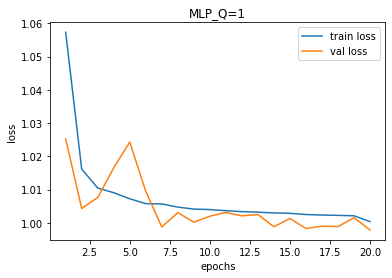

In [ ]:
main(Q=1,lr=0.01,epochs=10)

==> Preparing data..
==> Building model..
==> Resuming from last epoch..
Epoch   1 Train Loss: 1.00032 Test Loss: 0.99789
Epoch   2 Train Loss: 1.00033 Test Loss: 0.99787
Epoch   3 Train Loss: 1.00030 Test Loss: 0.99794
Epoch   4 Train Loss: 1.00031 Test Loss: 0.99797
Epoch   5 Train Loss: 1.00032 Test Loss: 0.99788
Epoch   6 Train Loss: 1.00030 Test Loss: 0.99803
Epoch   7 Train Loss: 1.00030 Test Loss: 0.99831
Epoch   8 Train Loss: 1.00030 Test Loss: 0.99810
Epoch   9 Train Loss: 1.00031 Test Loss: 0.99826
Epoch   10 Train Loss: 1.00034 Test Loss: 0.99782


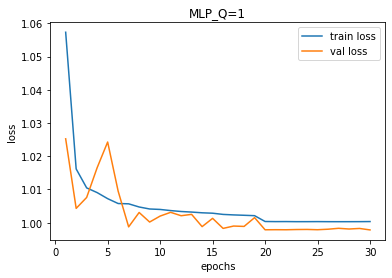

In [ ]:
main(Q=1,lr=0.001,epochs=10)

### Q=2 MLP Training

==> Preparing data..
==> Building model..
Epoch   1 Train Loss: 1.00774 Test Loss: 1.00451
Epoch   2 Train Loss: 1.00735 Test Loss: 1.00652
Epoch   3 Train Loss: 1.00653 Test Loss: 1.00514
Epoch   4 Train Loss: 1.00621 Test Loss: 1.02548
Epoch   5 Train Loss: 1.00542 Test Loss: 1.00417
Epoch   6 Train Loss: 1.00525 Test Loss: 1.00690
Epoch   7 Train Loss: 1.00506 Test Loss: 1.00627
Epoch   8 Train Loss: 1.00458 Test Loss: 1.00334
Epoch   9 Train Loss: 1.00428 Test Loss: 1.00563
Epoch   10 Train Loss: 1.00010 Test Loss: 1.00296
Epoch   11 Train Loss: 1.00007 Test Loss: 1.00311
Epoch   12 Train Loss: 1.00012 Test Loss: 1.00301
Epoch   13 Train Loss: 1.00004 Test Loss: 1.00309
Epoch   14 Train Loss: 1.00004 Test Loss: 1.00339
Epoch   15 Train Loss: 1.00007 Test Loss: 1.00342
Epoch   16 Train Loss: 1.00006 Test Loss: 1.00321
Epoch   17 Train Loss: 1.00008 Test Loss: 1.00306
Epoch   18 Train Loss: 1.00005 Test Loss: 1.00342
Epoch   19 Train Loss: 1.00010 Test Loss: 1.00300
Epoch   20 Train 

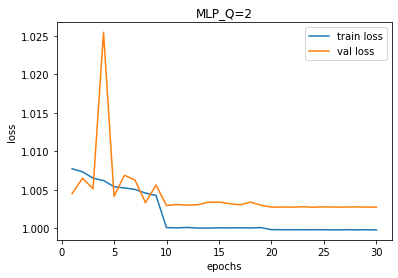

In [ ]:
main(Q=2,lr=0.01,epochs=30)

# Testing models : MLP Q=1

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import matplotlib.pyplot as plt
import numpy as np
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
net = DeepEEG_MLP_Model(97, 1)
net = net.to(device)
if device == 'cuda':
    net = torch.nn.DataParallel(net)
    cudnn.benchmark = True
net.load_state_dict(torch.load('drive/My Drive/models/MLP_Q=1_model.pth'))

<All keys matched successfully>

In [ ]:
X=np.load('drive/My Drive/Dataset/X_Q_1_MLP.npy')
Y=np.load('drive/My Drive/Dataset/Y_Q_1_MLP.npy')

In [ ]:
print(X.shape, Y.shape)

(1486881, 97) (1486881, 3)


In [ ]:
x=torch.from_numpy(X[100:300]).to(device)
y=Y[100:300]
y_=net(x).to('cpu').detach().numpy()

In [ ]:
y_stddev=np.array([[32.52091561], [39.55741222], [32.56242532]]).T

In [ ]:
eucl_dist=np.sqrt(np.sum((y_stddev*(y-y_))**2,axis=1))

In [ ]:
print(eucl_dist.mean())

58.72493161150442


In [ ]:
print(eucl_dist.min())

11.850801125511977


# Testing models : MLP Q=2

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
net = DeepEEG_MLP_Model(97, 2)
net = net.to(device)
if device == 'cuda':
    net = torch.nn.DataParallel(net)
    cudnn.benchmark = True
net.load_state_dict(torch.load('drive/My Drive/models/MLP_Q=2_model.pth'))

<All keys matched successfully>

In [ ]:
X=np.load('drive/My Drive/Dataset/X_Q_2_MLP.npy')
Y=np.load('drive/My Drive/Dataset/Y_Q_2_MLP.npy')

In [ ]:
print(X.shape, Y.shape)

(625000, 97) (625000, 6)


In [ ]:
x=torch.from_numpy(X[100:200]).to(device)
y=Y[100:200]
y_=net(x).to('cpu').detach().numpy()

In [ ]:
y_stddev=np.array([[30.23864226], [32.94725408], [34.24295688], [30.23864226], [32.94725408], [34.24295688]]).T

In [ ]:
eucl_dist=(y_stddev*(y-y_))**2
eucl_dist_1=np.sqrt(np.sum(eucl_dist[:,:3],axis=1))
eucl_dist_2=np.sqrt(np.sum(eucl_dist[:,3:],axis=1))

In [ ]:
print(eucl_dist_1.mean())
# print(eucl_dist_1)

54.07532207704922


In [ ]:
print(eucl_dist_1.min())

8.372657482653224


In [ ]:
print(eucl_dist_2.mean())
print(eucl_dist_2.min())

55.586021954754145
16.91903029555643


# Dataset Q=1 Preprocessing for CNN - Random shuffle and normalisation

In [ ]:
import numpy as np
path = 'drive/MyDrive/'

In [ ]:
Q=1
data_x=np.load(path+'X_Q=%d_CNN.npy'%Q).astype(np.float32)
data_y=np.load(path+'Y_Q=%d_CNN.npy'%Q).astype(np.float32) # labels

In [ ]:
print(data_x.shape, data_y.shape, data_x.dtype, data_y.dtype)

(215271, 97, 16) (215271, 3) float32 float32


In [ ]:
data_x[0,0]

array([ 0.0015235,  0.002833 ,  0.0037447,  0.0041304,  0.003936 ,
        0.0031888,  0.0019938,  0.0005187, -0.0010292, -0.0024326,
       -0.0034943, -0.0040652, -0.0040652, -0.0034943, -0.0024326,
       -0.0010292], dtype=float32)

In [ ]:
data_y[0]

array([ 27.5, -65. , -60. ], dtype=float32)

In [ ]:
# normalise the data (x,y)
x_mean=data_x.mean(axis=0,keepdims=True)
x_std=data_x.std(axis=0,keepdims=True)
y_mean=data_y.mean(axis=0,keepdims=True)
y_std=data_y.std(axis=0,keepdims=True)

In [ ]:
y_std

array([[35.536068, 40.47435 , 22.800743]], dtype=float32)

In [ ]:
print(x_mean.shape,x_std.shape,y_mean.shape,y_std.shape)

(1, 97, 16) (1, 97, 16) (1, 3) (1, 3)


In [ ]:
# print(x_mean,x_std,y_mean,y_std)

In [ ]:
data_x-=x_mean
data_x/=x_std
data_y-=y_mean
data_y/=y_std

In [ ]:
# random shuffling of data
data = np.hstack((data_x.reshape((215271,-1)),data_y))
data.shape

(215271, 1555)

In [ ]:
# print(data[0,:5])
np.random.shuffle(data)
# print(data[0,:5])

In [ ]:
data_x=data[:,:-3].reshape((-1,97,16))
data_y=data[:,-3:]
print(data_x.shape,data_y.shape)

(215271, 97, 16) (215271, 3)


In [ ]:
print(data_x.shape, data_y.shape)

(215271, 97, 16) (215271, 3)


In [ ]:
np.save(path+'Dataset/X_Q_%d_CNN.npy'%Q,data_x)
np.save(path+'Dataset/Y_Q_%d_CNN.npy'%Q,data_y)

# Dataset Q=2 Preprocessing for CNN - Random shuffle and normalisation

In [ ]:
import numpy as np
path = 'drive/MyDrive/'

In [ ]:
Q=2
data_x=np.load(path+'X_Q=%d_CNN.npy'%Q).astype(np.float32)
data_y=np.load(path+'Y_Q=%d_CNN.npy'%Q).astype(np.float32) # labels

In [ ]:
print(data_x.shape, data_y.shape, data_x.dtype, data_y.dtype)

(175000, 97, 16) (175000, 6) float32 float32


In [ ]:
data_x[0,0]

array([-0.0037015, -0.0072199, -0.0097243, -0.010863 , -0.010476 ,
       -0.0086176, -0.0055489, -0.001701 ,  0.0023859,  0.0061377,
        0.0090274,  0.010649 ,  0.010776 ,  0.0093884,  0.0066826,
        0.0030383], dtype=float32)

In [ ]:
data_y[0]

array([-37.5, -60. , -60. , -37.5, -60. , -45. ], dtype=float32)

In [ ]:
# normalise the data (x,y)
x_mean=data_x.mean(axis=0,keepdims=True)
x_std=data_x.std(axis=0,keepdims=True)
y_mean=data_y.mean(axis=0,keepdims=True)
y_std=data_y.std(axis=0,keepdims=True)

In [ ]:
y_std

array([[30.238642, 32.947254, 34.24296 , 30.238642, 32.947254, 34.242958]],
      dtype=float32)

In [ ]:
print(x_mean.shape,x_std.shape,y_mean.shape,y_std.shape)

(1, 97, 16) (1, 97, 16) (1, 6) (1, 6)


In [ ]:
# print(x_mean,x_std,y_mean,y_std)

In [ ]:
data_x-=x_mean
# data_x/=x_std
data_y-=y_mean
data_y/=y_std

In [ ]:
# random shuffling of data
data = np.hstack((data_x.reshape((175000,-1)),data_y))
data.shape

(175000, 1558)

In [ ]:
# print(data[0,:5])
np.random.shuffle(data)
# print(data[0,:5])

In [ ]:
data_x=data[:,:-6].reshape((-1,97,16))
data_y=data[:,-6:]
print(data_x.shape,data_y.shape)

(175000, 97, 16) (175000, 6)


In [ ]:
print(data_x.shape, data_y.shape)

(175000, 97, 16) (175000, 6)


In [ ]:
np.save(path+'Dataset/X_Q_%d_CNN.npy'%Q,data_x)
np.save(path+'Dataset/Y_Q_%d_CNN.npy'%Q,data_y)

# Engineering CNN Model for EEG Source Localisation

In [ ]:
import torch
import torch.nn as nn

In [ ]:
[1]*5

[1, 1, 1, 1, 1]

In [ ]:
conv=[nn.Conv1d(in_channels=1, out_channels=32, kernel_size=5)]*97

In [ ]:
inp=torch.ones((1,2,2))
print(inp.shape)
print(inp[0])

torch.Size([1, 2, 2])
tensor([[1., 1.],
        [1., 1.]])


In [ ]:
inp=torch.unsqueeze(inp,2)
inp.shape

torch.Size([1, 2, 1, 2])

In [ ]:
print(inp[0])

tensor([[[1., 1.]],

        [[1., 1.]]])


In [ ]:
c=nn.Conv1d(in_channels=1, out_channels=32, kernel_size=5)
c(torch.rand((1,1,50))) # batch_size, in_channels, num_of_samples_from_time

tensor([[[-0.0046, -0.0552, -0.2932,  ..., -0.2048,  0.2789,  0.0527],
         [-0.4330, -0.1782, -0.1129,  ..., -0.2589, -0.2391, -0.1761],
         [ 0.0757,  0.0628, -0.2210,  ..., -0.2880, -0.0476, -0.0350],
         ...,
         [-0.6165, -0.4769, -0.4129,  ..., -0.4412, -0.1793, -0.3221],
         [ 0.3755,  0.4273,  0.1089,  ..., -0.0619,  0.4544,  0.5194],
         [-0.0310, -0.1966,  0.2282,  ...,  0.3924,  0.0740,  0.1449]]],
       grad_fn=<SqueezeBackward1>)

In [ ]:
inp=torch.rand((2,97,50))
inp = torch.unsqueeze(inp,2)
out=0
for row in range(97):
  y=conv[row](inp[:,row])
  out+=y
  # print(y.shape)

In [ ]:
out.shape

torch.Size([2, 32, 46])

In [ ]:
out=out.view(out.size(0),-1)
out.shape

torch.Size([2, 1472])

# Deep EEG - Convolutional Neural Network

In [ ]:
import torch
import torch.nn as nn

class DeepEEG_CNN(nn.Module): 
  def __init__(self, M, num_of_samples, L, Q):
    super(DeepEEG_CNN, self).__init__()
    self.conv = nn.ModuleList([nn.Conv1d(in_channels=1, out_channels=L, kernel_size=5) for i in range(M)])
    self.fc1 = nn.Linear(384, 3000)
    self.fc2 = nn.Linear(3000, 2500)
    self.fc3 = nn.Linear(2500, 1200)
    self.fc4 = nn.Linear(1200, 3*Q) #3 coordinates for each ECD source

  def forward(self,inp):
    inp = torch.unsqueeze(inp,2)
    out=0
    for row in range(inp.shape[1]):
      out+=self.conv[row](inp[:,row])
    out=out.view(out.size(0),-1)
    out = torch.sigmoid(self.fc1(out))
    out = torch.sigmoid(self.fc2(out))
    out = torch.sigmoid(self.fc3(out))
    out = self.fc4(out)
    return out

def DeepEEG_CNN_Model(M=97, num_of_samples=16, L=32, Q=1):
  # M - number of sensors
  # num_of_samples - across time
  # Q - number of equivalent current dipole (ECD) sources 
  return DeepEEG_CNN(M, num_of_samples, L, Q)

In [ ]:
from torchsummary import summary
net = DeepEEG_CNN_Model(97, 16, 32, 2)
# summary(net, input_size=(97,16))
net

DeepEEG_CNN(
  (conv): ModuleList(
    (0): Conv1d(1, 32, kernel_size=(5,), stride=(1,))
    (1): Conv1d(1, 32, kernel_size=(5,), stride=(1,))
    (2): Conv1d(1, 32, kernel_size=(5,), stride=(1,))
    (3): Conv1d(1, 32, kernel_size=(5,), stride=(1,))
    (4): Conv1d(1, 32, kernel_size=(5,), stride=(1,))
    (5): Conv1d(1, 32, kernel_size=(5,), stride=(1,))
    (6): Conv1d(1, 32, kernel_size=(5,), stride=(1,))
    (7): Conv1d(1, 32, kernel_size=(5,), stride=(1,))
    (8): Conv1d(1, 32, kernel_size=(5,), stride=(1,))
    (9): Conv1d(1, 32, kernel_size=(5,), stride=(1,))
    (10): Conv1d(1, 32, kernel_size=(5,), stride=(1,))
    (11): Conv1d(1, 32, kernel_size=(5,), stride=(1,))
    (12): Conv1d(1, 32, kernel_size=(5,), stride=(1,))
    (13): Conv1d(1, 32, kernel_size=(5,), stride=(1,))
    (14): Conv1d(1, 32, kernel_size=(5,), stride=(1,))
    (15): Conv1d(1, 32, kernel_size=(5,), stride=(1,))
    (16): Conv1d(1, 32, kernel_size=(5,), stride=(1,))
    (17): Conv1d(1, 32, kernel_size=(5,)

# Execute Model Training

In [ ]:
Q=1
y=np.load('drive/My Drive/Dataset/Y_Q_%d_CNN.npy'%Q)
y.shape

(215271, 3)

In [ ]:
Q=2
x=np.load('drive/My Drive/Dataset/X_Q_%d_CNN.npy'%Q)
x.shape

(175000, 97, 16)

In [ ]:
import os
import numpy as np
import PIL.Image as Image
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset

class EEG(Dataset):
    def __init__(self, root='./', train=True, Q=2, split=0.8):
        super(EEG, self).__init__()
        path='train' if train else 'val'
        self.data=np.load(root+'X_Q_%d_CNN.npy'%Q)
        self.targets=np.load(root+'Y_Q_%d_CNN.npy'%Q)
        split=int(0.8*self.data.shape[0])
        if train:
            self.data=self.data[:split]
            self.targets=self.targets[:split]
        else:
            self.data=self.data[split:]
            self.targets=self.targets[split:]

    def __getitem__(self, index):
        x, target = self.data[index], self.targets[index]
        return x, target

    def __len__(self):
        return self.data.shape[0]

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader

def main(Q, lr, epochs):
    exp_name='CNN_Q=%d'%Q
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    # print(torch.cuda.get_device_properties(0))
    
    # Data
    print('==> Preparing data..')
    path = 'drive/MyDrive/Dataset/'
    trainset = EEG(root=path,train=True,Q=Q,split=.8)
    trainloader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
    testset = EEG(root=path,train=False,Q=Q,split=.8)
    testloader = DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

    # Model
    print('==> Building model..')
    net = DeepEEG_CNN_Model(M=97, num_of_samples=16, L=32, Q=Q)
    net = net.to(device)
    if device == 'cuda':
        net = torch.nn.DataParallel(net)
        cudnn.benchmark = True

    start_epoch = 1
    end_epoch = epochs+1
    # Load checkpoint.
    if os.path.exists('%s_model.pth'%exp_name):        
        print('==> Resuming from last epoch..')
        net.load_state_dict(torch.load('%s_model.pth'%exp_name))

    criterion = nn.MSELoss()
    optimizer = optim.SGD(net.parameters(), lr=lr) #, momentum=0.9, weight_decay=0.0001
    trainloss, testloss, trainacc, testacc = [], [], [], []
    for epoch in range(start_epoch, end_epoch):
        # if epoch==5:
            # lr/=10.
            # optimizer = optim.SGD(net.parameters(), lr=lr) #, momentum=0.9, weight_decay=0.0001
        l=train(epoch, net, trainloader, device, optimizer, criterion)
        trainloss.append(l)
        l=test(epoch, net, testloader, device, criterion, exp_name)
        testloss.append(l)

        print('Epoch  % 2d Train Loss: %2.5f Test Loss: %2.5f'%(epoch,trainloss[-1],testloss[-1]))
        # display.clear_output(wait=True)

    torch.save(net.state_dict(), '%s_model.pth'%exp_name)
    Save_Stats(trainloss, testloss, exp_name)

def train(epoch, net, trainloader, device, optimizer, criterion):
    net.train()
    train_loss = 0
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device).float(), targets.to(device).float()
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    return train_loss/(batch_idx+1)

def test(epoch, net, testloader, device, criterion, exp_name):
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device).float(), targets.to(device).float()
            outputs = net(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item()
    return test_loss/(batch_idx+1)

def Save_Stats(trainloss, testloss, exp_name):
    data=[]
    data.append(trainloss)
    data.append(testloss)
    data=np.array(data)
    data.reshape((2,-1))
    stats_path = '%s.npy'%exp_name
    if os.path.exists(stats_path):
        data_old = np.load(stats_path)
        data = np.hstack((data_old,data))
    np.save(stats_path,data)

    SavePlots(data[0], data[1], 'loss', exp_name)

def SavePlots(y1, y2, metric, exp_name):
    try:
        plt.clf()
    except Exception as e:
        pass
    # plt.style.use('seaborn')
    plt.title(exp_name)
    plt.xlabel('epochs')
    plt.ylabel(metric)
    epochs=np.arange(1,len(y1)+1,1)
    plt.plot(epochs,y1,label='train %s'%metric)
    plt.plot(epochs,y2,label='val %s'%metric)
    plt.legend()
    plt.savefig('%s_%s'%(exp_name,metric), dpi=95)

==> Preparing data..
==> Building model..
Epoch   1 Train Loss: 1.03042 Test Loss: 1.00139
Epoch   2 Train Loss: 0.99202 Test Loss: 1.05483
Epoch   3 Train Loss: 0.98895 Test Loss: 1.00244
Epoch   4 Train Loss: 0.98535 Test Loss: 0.99749
Epoch   5 Train Loss: 0.98405 Test Loss: 0.98806


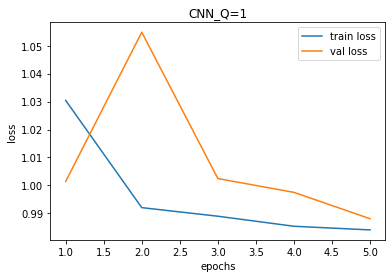

In [ ]:
main(Q=1,lr=0.01,epochs=5)

==> Preparing data..
==> Building model..
==> Resuming from last epoch..
Epoch   1 Train Loss: 0.98281 Test Loss: 1.00976
Epoch   2 Train Loss: 0.98268 Test Loss: 0.98075
Epoch   3 Train Loss: 0.98191 Test Loss: 0.98019
Epoch   4 Train Loss: 0.98139 Test Loss: 0.99175
Epoch   5 Train Loss: 0.98104 Test Loss: 0.99134


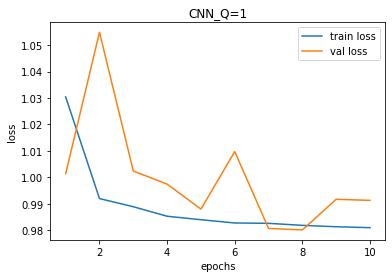

In [ ]:
main(Q=1,lr=0.01,epochs=5)

==> Preparing data..
==> Building model..
==> Resuming from last epoch..
Epoch   1 Train Loss: 0.97770 Test Loss: 0.97927
Epoch   2 Train Loss: 0.97764 Test Loss: 0.97939
Epoch   3 Train Loss: 0.97773 Test Loss: 0.97929
Epoch   4 Train Loss: 0.97763 Test Loss: 0.97918
Epoch   5 Train Loss: 0.97765 Test Loss: 0.97951


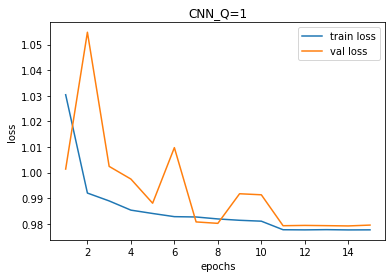

In [ ]:
main(Q=1,lr=0.001,epochs=5)

==> Preparing data..
==> Building model..
Epoch   1 Train Loss: 1.00895 Test Loss: 1.01064
Epoch   2 Train Loss: 1.00814 Test Loss: 1.01110
Epoch   3 Train Loss: 1.00874 Test Loss: 1.00322
Epoch   4 Train Loss: 1.00833 Test Loss: 1.00400
Epoch   5 Train Loss: 1.00777 Test Loss: 1.00226


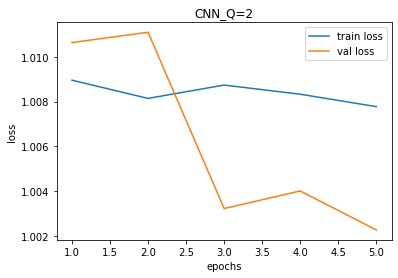

In [ ]:
main(Q=2,lr=0.01,epochs=5)

==> Preparing data..
==> Building model..
==> Resuming from last epoch..
Epoch   1 Train Loss: 1.00060 Test Loss: 1.00059
Epoch   2 Train Loss: 1.00052 Test Loss: 1.00065
Epoch   3 Train Loss: 1.00050 Test Loss: 1.00031
Epoch   4 Train Loss: 1.00055 Test Loss: 1.00079
Epoch   5 Train Loss: 1.00052 Test Loss: 1.00039


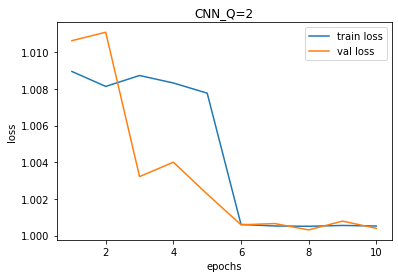

In [ ]:
main(Q=2,lr=0.001,epochs=5)

==> Preparing data..
==> Building model..
==> Resuming from last epoch..
Epoch   1 Train Loss: 1.00016 Test Loss: 1.00029
Epoch   2 Train Loss: 1.00016 Test Loss: 1.00031
Epoch   3 Train Loss: 1.00014 Test Loss: 1.00043
Epoch   4 Train Loss: 1.00016 Test Loss: 1.00037
Epoch   5 Train Loss: 1.00016 Test Loss: 1.00033


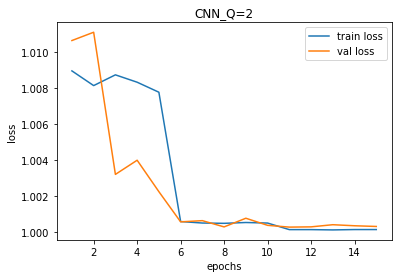

In [ ]:
main(Q=2,lr=0.0001,epochs=5)

# Testing models : CNN Q=1

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
net = DeepEEG_CNN_Model(97, 16, 32, 1)
net = net.to(device)
if device == 'cuda':
    net = torch.nn.DataParallel(net)
    cudnn.benchmark = True
net.load_state_dict(torch.load('drive/My Drive/models/CNN_Q=1_model.pth')) #drive/My Drive/models/

<All keys matched successfully>

In [ ]:
X=np.load('drive/My Drive/Dataset/X_Q_1_CNN.npy')
Y=np.load('drive/My Drive/Dataset/Y_Q_1_CNN.npy')

In [ ]:
print(X.shape, Y.shape)

(215271, 97, 16) (215271, 3)


In [ ]:
net=net.to(device)
x=torch.from_numpy(X[100:200]).to(device)
y=Y[100:200]
y_=net(x).detach().cpu().numpy()

In [ ]:
y_stddev=np.array([[35.536068], [40.47435], [22.800743]]).T

In [ ]:
eucl_dist=np.sqrt(np.sum((y_stddev*(y-y_))**2,axis=1))

In [ ]:
print(eucl_dist.mean())
# print(eucl_dist)

58.785515846193796


In [ ]:
print(eucl_dist.min())
# print(eucl_dist)

5.46667386662273


# Testing models : CNN Q=2

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
net = DeepEEG_CNN_Model(97, 16, 32, 2)
net = net.to(device)
if device == 'cuda':
    net = torch.nn.DataParallel(net)
    cudnn.benchmark = True
net.load_state_dict(torch.load('drive/My Drive/models/CNN_Q=2_model.pth',map_location=device))

RuntimeError: ignored

In [ ]:
X=np.load('drive/My Drive/Dataset/X_Q_2_CNN.npy')
Y=np.load('drive/My Drive/Dataset/Y_Q_2_CNN.npy')

In [ ]:
print(X.shape, Y.shape)

(175000, 97, 16) (175000, 6)


In [ ]:
x=torch.from_numpy(X[100:200]).to(device)
y=Y[100:200]
y_=net(x).to('cpu').detach().numpy()

In [ ]:
y_stddev=np.array([[30.238642], [32.947254], [34.24296], [30.238642], [32.947254], [34.242958]]).T

In [ ]:
eucl_dist=(y_stddev*(y-y_))**2
eucl_dist_1=np.sqrt(np.sum(eucl_dist[:,:3],axis=1))
eucl_dist_2=np.sqrt(np.sum(eucl_dist[:,3:],axis=1))

In [ ]:
print(eucl_dist_1.mean())
# print(eucl_dist_1)

54.41222552932773


In [ ]:
print(eucl_dist_2.mean())
# print(eucl_dist_2)

53.1328841525556


# Engineering 2D Conv CNN Model for EEG Source Localisation

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
c1=nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, padding=1)
p1=nn.MaxPool2d(kernel_size=2, stride=2)
c2=nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
p2=nn.MaxPool2d(kernel_size=2,stride=2)
c3=nn.Conv2d(in_channels=64, out_channels=256, kernel_size=3, padding=1, stride=2)
gap1=nn.AvgPool2d(kernel_size=(12,2))

In [ ]:
op=torch.rand(1,1,97,16)
layers=[c1,p1,c2,p2,c3,gap1]
for layer in layers:
  op=layer(op)
  print(op.shape)

torch.Size([1, 3, 97, 16])
torch.Size([1, 3, 48, 8])
torch.Size([1, 64, 48, 8])
torch.Size([1, 64, 24, 4])
torch.Size([1, 256, 12, 2])
torch.Size([1, 256, 1, 1])


In [ ]:
inp=torch.rand(2,97,16)
inp=torch.unsqueeze(inp,1)
inp.shape

torch.Size([2, 1, 97, 16])

# 2-D Convolutional CNN

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class DeepEEG_CNN(nn.Module): 
  def __init__(self, M, num_of_samples, Q):
    super(DeepEEG_CNN, self).__init__()
    self.c1=nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, padding=1)
    self.p1=nn.MaxPool2d(kernel_size=2, stride=2)
    self.c2=nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
    self.p2=nn.MaxPool2d(kernel_size=2,stride=2)
    self.c3=nn.Conv2d(in_channels=64, out_channels=256, kernel_size=3, padding=1, stride=2)
    self.gap1=nn.AvgPool2d(kernel_size=(12,2))
    self.fc1 = nn.Linear(256, 3000)
    self.fc2 = nn.Linear(3000, 2500)
    self.fc3 = nn.Linear(2500, 1200)
    self.fc4 = nn.Linear(1200, 3*Q) #3 coordinates for each ECD source

  def forward(self,inp):
    inp = torch.unsqueeze(inp,1) #batch_size x 1 x 97 x 16
    out = F.relu(self.c1(inp))
    out = self.p1(out)
    out = F.relu(self.c2(out))
    out = self.p2(out)
    out = F.relu(self.c3(out))
    out = self.gap1(out)
    out = out.view(out.size(0),-1)
    out = torch.sigmoid(self.fc1(out))
    out = torch.sigmoid(self.fc2(out))
    out = torch.sigmoid(self.fc3(out))
    out = self.fc4(out)
    return out

def DeepEEG_CNN_Model(M=97, num_of_samples=16, Q=1):
  # M - number of sensors
  # num_of_samples - across time
  # Q - number of equivalent current dipole (ECD) sources 
  return DeepEEG_CNN(M, num_of_samples, Q)

In [ ]:
from torchsummary import summary
net = DeepEEG_CNN_Model(97, 16 , 1)
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
net = net.to(device)
summary(net, input_size=(97,16))
# net

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 3, 97, 16]              30
         MaxPool2d-2             [-1, 3, 48, 8]               0
            Conv2d-3            [-1, 64, 48, 8]           1,792
         MaxPool2d-4            [-1, 64, 24, 4]               0
            Conv2d-5           [-1, 256, 12, 2]         147,712
         AvgPool2d-6            [-1, 256, 1, 1]               0
            Linear-7                 [-1, 3000]         771,000
            Linear-8                 [-1, 2500]       7,502,500
            Linear-9                 [-1, 1200]       3,001,200
           Linear-10                    [-1, 3]           3,603
Total params: 11,427,837
Trainable params: 11,427,837
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.38
Params size (MB): 43.59
Esti

# Execute Model Training

In [ ]:
Q=1
y=np.load('drive/My Drive/Dataset/Y_Q_%d_CNN.npy'%Q)
print(y.shape)
Q=2
x=np.load('drive/My Drive/Dataset/X_Q_%d_CNN.npy'%Q)
print(x.shape)

(215271, 3)
(175000, 97, 16)


In [ ]:
import os
import numpy as np
import PIL.Image as Image
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset

class EEG(Dataset):
    def __init__(self, root='./', train=True, Q=2, split=0.8):
        super(EEG, self).__init__()
        path='train' if train else 'val'
        self.data=np.load(root+'X_Q_%d_CNN.npy'%Q)
        self.targets=np.load(root+'Y_Q_%d_CNN.npy'%Q)
        split=int(0.8*self.data.shape[0])
        if train:
            self.data=self.data[:split]
            self.targets=self.targets[:split]
        else:
            self.data=self.data[split:]
            self.targets=self.targets[split:]

    def __getitem__(self, index):
        x, target = self.data[index], self.targets[index]
        return x, target

    def __len__(self):
        return self.data.shape[0]

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader

def main(Q, lr, epochs):
    exp_name='2dCNN_Q=%d'%Q
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    # print(torch.cuda.get_device_properties(0))
    
    # Data
    print('==> Preparing data..')
    path = 'drive/MyDrive/Dataset/'
    trainset = EEG(root=path,train=True,Q=Q,split=.8)
    trainloader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
    testset = EEG(root=path,train=False,Q=Q,split=.8)
    testloader = DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

    # Model
    print('==> Building model..')
    net = DeepEEG_CNN_Model(M=97, num_of_samples=16, Q=Q)
    net = net.to(device)
    if device == 'cuda':
        net = torch.nn.DataParallel(net)
        cudnn.benchmark = True

    start_epoch = 1
    end_epoch = epochs+1
    # Load checkpoint.
    if os.path.exists('%s_model.pth'%exp_name):        
        print('==> Resuming from last epoch..')
        net.load_state_dict(torch.load('%s_model.pth'%exp_name))

    criterion = nn.MSELoss()
    optimizer = optim.SGD(net.parameters(), lr=lr) #, momentum=0.9, weight_decay=0.0001
    trainloss, testloss, trainacc, testacc = [], [], [], []
    for epoch in range(start_epoch, end_epoch):
        # if epoch==5:
            # lr/=10.
            # optimizer = optim.SGD(net.parameters(), lr=lr) #, momentum=0.9, weight_decay=0.0001
        l=train(epoch, net, trainloader, device, optimizer, criterion)
        trainloss.append(l)
        l=test(epoch, net, testloader, device, criterion, exp_name)
        testloss.append(l)

        print('Epoch  % 2d Train Loss: %2.5f Test Loss: %2.5f'%(epoch,trainloss[-1],testloss[-1]))
        # display.clear_output(wait=True)

    torch.save(net.state_dict(), '%s_model.pth'%exp_name)
    Save_Stats(trainloss, testloss, exp_name)

def train(epoch, net, trainloader, device, optimizer, criterion):
    net.train()
    train_loss = 0
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device).float(), targets.to(device).float()
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    return train_loss/(batch_idx+1)

def test(epoch, net, testloader, device, criterion, exp_name):
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device).float(), targets.to(device).float()
            outputs = net(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item()
    return test_loss/(batch_idx+1)

def Save_Stats(trainloss, testloss, exp_name):
    data=[]
    data.append(trainloss)
    data.append(testloss)
    data=np.array(data)
    data.reshape((2,-1))
    stats_path = '%s.npy'%exp_name
    if os.path.exists(stats_path):
        data_old = np.load(stats_path)
        data = np.hstack((data_old,data))
    np.save(stats_path,data)

    SavePlots(data[0], data[1], 'loss', exp_name)

def SavePlots(y1, y2, metric, exp_name):
    try:
        plt.clf()
    except Exception as e:
        pass
    # plt.style.use('seaborn')
    plt.title(exp_name)
    plt.xlabel('epochs')
    plt.ylabel(metric)
    epochs=np.arange(1,len(y1)+1,1)
    plt.plot(epochs,y1,label='train %s'%metric)
    plt.plot(epochs,y2,label='val %s'%metric)
    plt.legend()
    plt.savefig('%s_%s'%(exp_name,metric), dpi=95)

==> Preparing data..
==> Building model..
Epoch   1 Train Loss: 1.05181 Test Loss: 1.06942
Epoch   2 Train Loss: 1.01426 Test Loss: 1.00884
Epoch   3 Train Loss: 1.01031 Test Loss: 1.02032
Epoch   4 Train Loss: 1.00856 Test Loss: 1.02262
Epoch   5 Train Loss: 1.00633 Test Loss: 1.01300


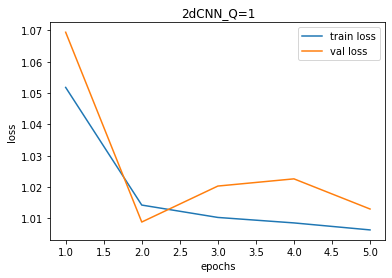

In [ ]:
main(Q=1,lr=0.01,epochs=5)

==> Preparing data..
==> Building model..
==> Resuming from last epoch..
Epoch   1 Train Loss: 1.00555 Test Loss: 1.01717
Epoch   2 Train Loss: 1.00510 Test Loss: 1.02964
Epoch   3 Train Loss: 1.00453 Test Loss: 1.00967
Epoch   4 Train Loss: 1.00372 Test Loss: 1.00596
Epoch   5 Train Loss: 1.00407 Test Loss: 1.00287


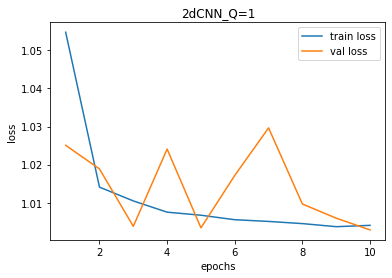

In [ ]:
main(Q=1,lr=0.01,epochs=5)

==> Preparing data..
==> Building model..
==> Resuming from last epoch..
Epoch   1 Train Loss: 1.00028 Test Loss: 1.00126
Epoch   2 Train Loss: 1.00017 Test Loss: 1.00170
Epoch   3 Train Loss: 1.00027 Test Loss: 1.00169
Epoch   4 Train Loss: 1.00020 Test Loss: 1.00130
Epoch   5 Train Loss: 1.00024 Test Loss: 1.00132


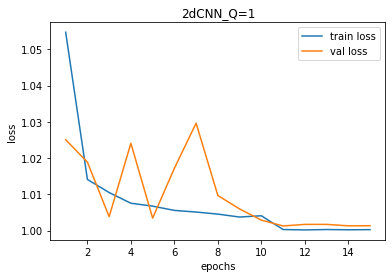

In [ ]:
main(Q=1,lr=0.001,epochs=5)

==> Preparing data..
==> Building model..
==> Resuming from last epoch..
Epoch   1 Train Loss: 1.00007 Test Loss: 1.00128
Epoch   2 Train Loss: 1.00002 Test Loss: 1.00132
Epoch   3 Train Loss: 1.00003 Test Loss: 1.00127
Epoch   4 Train Loss: 1.00002 Test Loss: 1.00123
Epoch   5 Train Loss: 1.00002 Test Loss: 1.00139


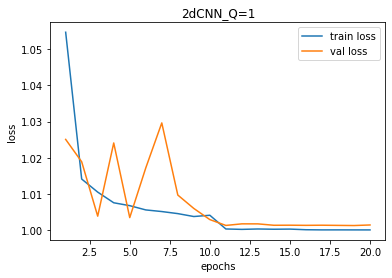

In [ ]:
main(Q=1,lr=0.0001,epochs=5)

==> Preparing data..
==> Building model..
Epoch   1 Train Loss: 1.00898 Test Loss: 1.00457
Epoch   2 Train Loss: 1.00753 Test Loss: 1.00613
Epoch   3 Train Loss: 1.00711 Test Loss: 1.01319
Epoch   4 Train Loss: 1.00693 Test Loss: 1.01451
Epoch   5 Train Loss: 1.00644 Test Loss: 1.00168


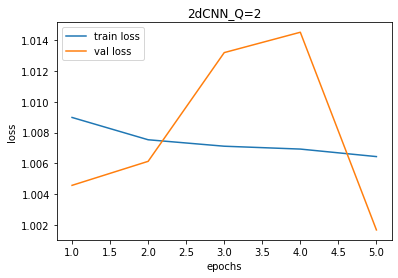

In [ ]:
main(Q=2,lr=0.01,epochs=5)

==> Preparing data..
==> Building model..
==> Resuming from last epoch..
Epoch   1 Train Loss: 1.00013 Test Loss: 1.00106
Epoch   2 Train Loss: 1.00011 Test Loss: 1.00189
Epoch   3 Train Loss: 1.00011 Test Loss: 1.00116
Epoch   4 Train Loss: 1.00007 Test Loss: 1.00153
Epoch   5 Train Loss: 1.00004 Test Loss: 1.00118


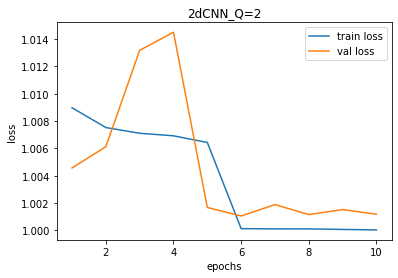

In [ ]:
main(Q=2,lr=0.001,epochs=5)

==> Preparing data..
==> Building model..
==> Resuming from last epoch..
Epoch   1 Train Loss: 0.99979 Test Loss: 1.00108
Epoch   2 Train Loss: 0.99976 Test Loss: 1.00110
Epoch   3 Train Loss: 0.99977 Test Loss: 1.00108
Epoch   4 Train Loss: 0.99980 Test Loss: 1.00114
Epoch   5 Train Loss: 0.99981 Test Loss: 1.00113


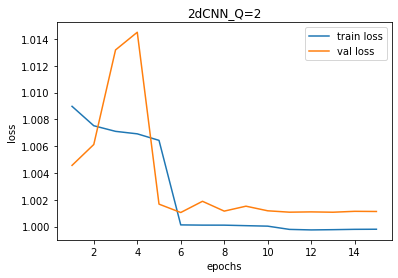

In [ ]:
main(Q=2,lr=0.0001,epochs=5)

# Testing models : 2dCNN Q=1

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
net = DeepEEG_CNN_Model(97, 16, 1)
net = net.to(device)
if device == 'cuda':
    net = torch.nn.DataParallel(net)
    cudnn.benchmark = True
net.load_state_dict(torch.load('drive/My Drive/models/2dCNN_Q=1_model.pth')) #drive/My Drive/models/

<All keys matched successfully>

In [ ]:
X=np.load('drive/My Drive/Dataset/X_Q_1_CNN.npy')
Y=np.load('drive/My Drive/Dataset/Y_Q_1_CNN.npy')

In [ ]:
x=torch.from_numpy(X[100:200]).to(device)
y=Y[100:200]
y_=net(x).to('cpu').detach().numpy()

In [ ]:
y_stddev=np.array([[35.536068], [40.47435], [22.800743]]).T

In [ ]:
eucl_dist=np.sqrt(np.sum((y_stddev*(y-y_))**2,axis=1))

In [ ]:
print(eucl_dist.mean())
# print(eucl_dist)

59.26020518080737


In [ ]:
print(eucl_dist.min())

3.659040840784409


# Testing models : 2dCNN Q=2

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
net = DeepEEG_CNN_Model(97, 16, 2)
net = net.to(device)
if device == 'cuda':
    net = torch.nn.DataParallel(net)
    cudnn.benchmark = True
net.load_state_dict(torch.load('drive/My Drive/models/2dCNN_Q=2_model.pth'))

<All keys matched successfully>

In [ ]:
X=np.load('drive/My Drive/Dataset/X_Q_2_CNN.npy')
Y=np.load('drive/My Drive/Dataset/Y_Q_2_CNN.npy')

In [ ]:
x=torch.from_numpy(X[100:200]).to(device)
y=Y[100:200]
y_=net(x).to('cpu').detach().numpy()

In [ ]:
y_stddev=np.array([[30.238642], [32.947254], [34.24296], [30.238642], [32.947254], [34.242958]]).T

In [ ]:
eucl_dist=(y_stddev*(y-y_))**2
eucl_dist_1=np.sqrt(np.sum(eucl_dist[:,:3],axis=1))
eucl_dist_2=np.sqrt(np.sum(eucl_dist[:,3:],axis=1))

In [ ]:
print(eucl_dist_1.mean())
print(eucl_dist_1.min())
# print(eucl_dist_1)

54.370976056664766
9.576820461382185


In [ ]:
print(eucl_dist_2.mean())
print(eucl_dist_2.min())
# print(eucl_dist_2)

53.127489331157946
13.804424162090655
